# Scatter plot

* matplotlib -> plt.scatter()
* Seaborn -> sb.regplot() with a regression line

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

In [5]:
fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0, 0.5, 'Combined fuel efficiency')

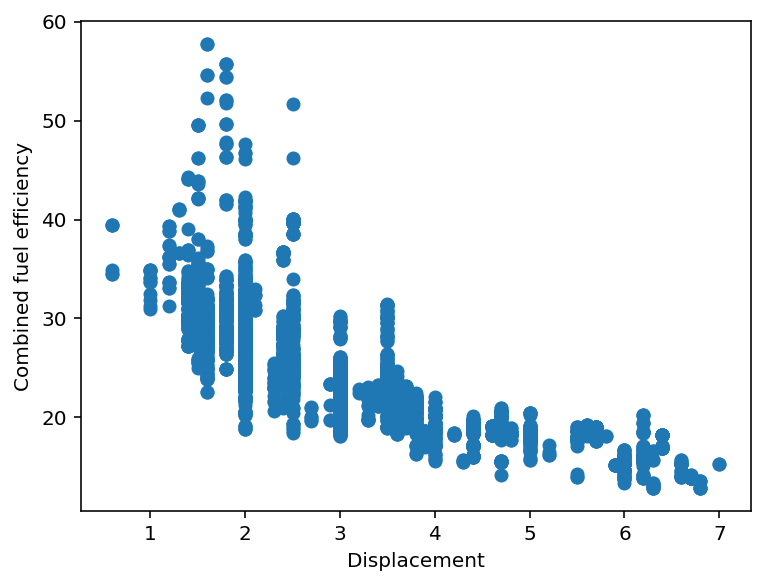

In [10]:
plt.scatter(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement')
plt.ylabel('Combined fuel efficiency')

Text(0, 0.5, 'Combined fuel efficiency')

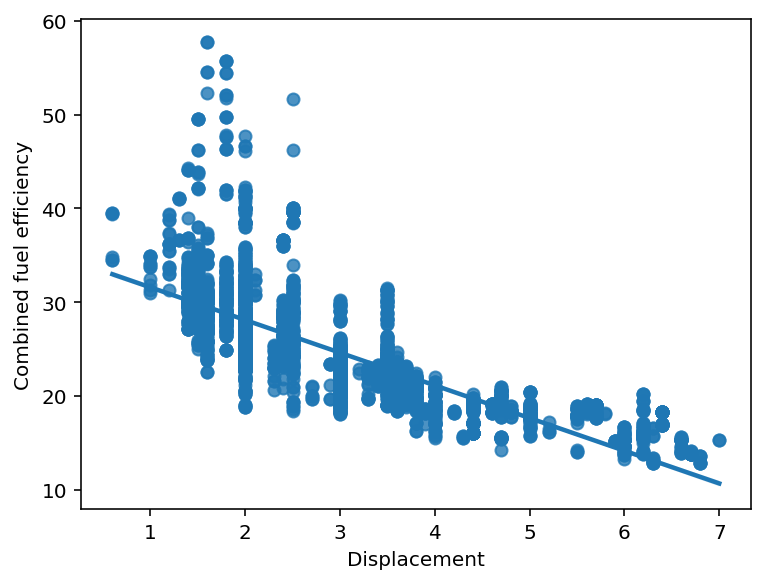

In [13]:
#Seaborn
sb.regplot(data=fuel_econ, x='displ', y='comb');
#sb.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False);
plt.xlabel('Displacement')
plt.ylabel('Combined fuel efficiency')

## Overplotting

Resolve with
* Sampling
* Transparency - plot with alpha
* Jitter 

The jitter settings will cause **each point to be plotted in a uniform ±0.2 range of their true values**. This is not a direct option in matplotlib's scatter function, but is a built-in option with seaborn's regplot function. x- and y- jitter can be added independently, and won't affect the fit of any regression function

Note that transparency has been changed to be a dictionary assigned to the `"scatter_kws"` parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

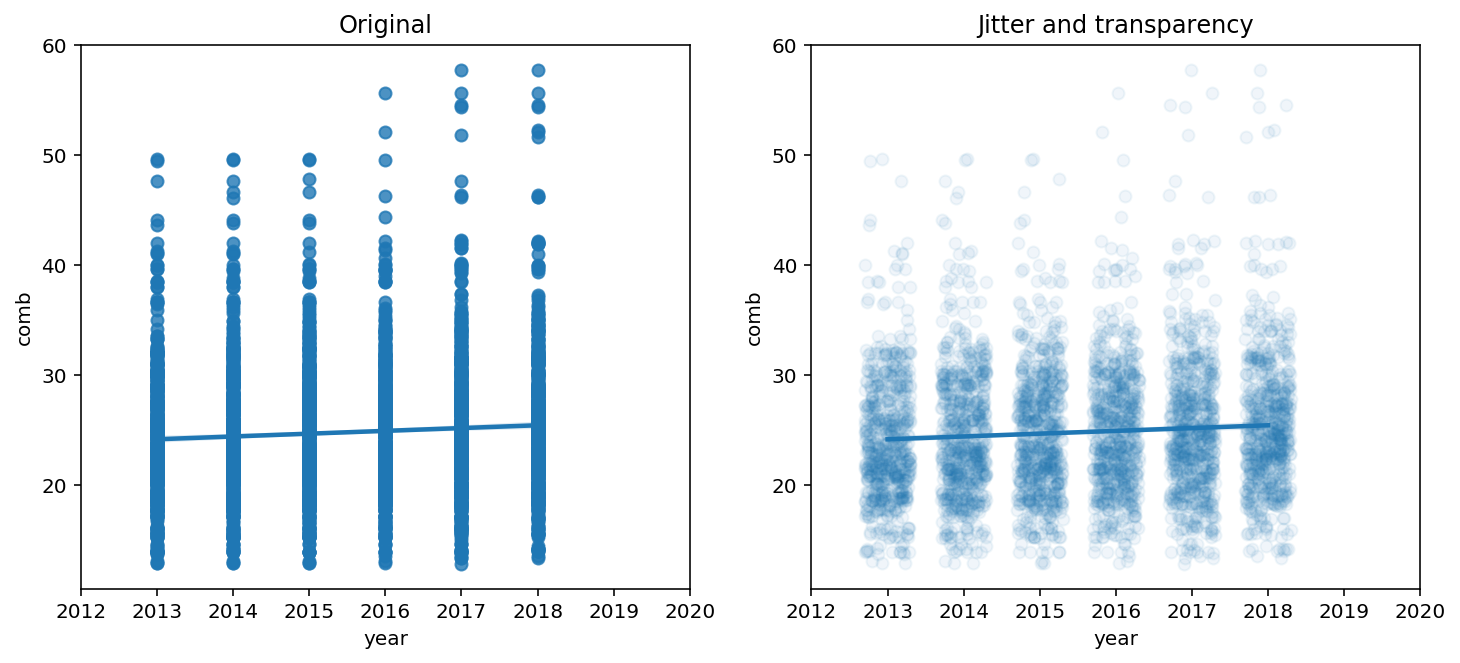

In [25]:
fig = plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.title('Original')
sb.regplot(data=fuel_econ, x='year', y='comb');
plt.xlim([2012, 2020]);

plt.subplot(1,2,2)
plt.title('Jitter and transparency')
sb.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3,
          scatter_kws = {'alpha' : 1/15});
plt.xlim([2012, 2020]);

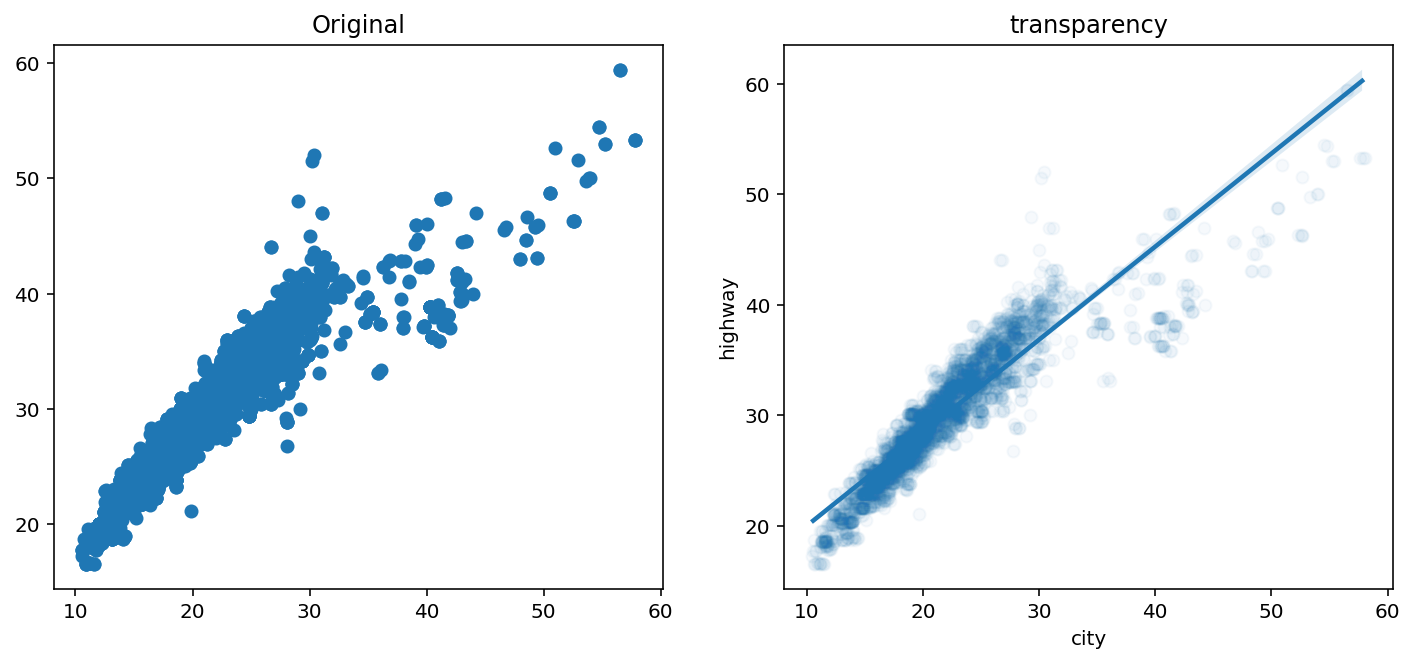

In [29]:
fig = plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.title('Original')
plt.scatter(data=fuel_econ, x='city', y='highway');

plt.subplot(1,2,2)
plt.title('transparency')
sb.regplot(data=fuel_econ, x='city', y='highway', x_jitter=0.3,
          scatter_kws = {'alpha' : 1/25});


Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.